# Praktikum : Classification - MNIST

**Docker:**
- Laden Sie das Jupyter Notebook von Moodle in einen ML1-Praktikums-Ordner in Ihrem User-Ordner. 
- Geben Sie im Terminal ein: "docker_start_ml1_gpu". Dadurch wird ein Skript aufgerufen, das einen Docker-Container für Sie baut. Das Terminal bleibt offen, wechselt nun allerdings in einen Terminal des Docker-Containers.
- Öffnen Sie den angegebenen localhost:8888-Link mit Token im Browser. Ein Jupyter Notebook sollte sich öffnen. Unter dem Ordner "host" finden Sie Ihr Homedirectory und auch das Jupyter-Notebook für das Praktikum. 
- Zum Ende des Praktikums speichern Sie Ihre Fortschritte, und beenden dann den Docker Container mit der Eingabe von "exit" im Terminal. 


Wir haben in der Vorlesung das MNIST Dataset besprochen: Der ursprüngliche Datensatz besteht aus 70.000 28x28 Schwarzweiß-Bildern der handgeschriebenen Ziffern 0,1,2, ... 9, sowie der zugehörigen Klassifizierung der Bilder. 

Ziel: Wir wollen mit Hilfe dieser Daten Modelle trainieren, die handgeschriebene Ziffern von 0 bis 9 automatisch erkennen. 


Führen Sie den folgenden Code aus, um die Daten zu laden:


In [1]:
#Import der notwendigen Dependencies
import os
#zum Entpacken von Dateien:
import tarfile
#zum Herunterladen von Dateien:
import urllib.request
#zum Bearbeiten von "DataFrames"
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

MNIST_PATH = os.path.join("datasets", "MNIST")

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, data_home=MNIST_PATH)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original', data_home=MNIST_PATH)

X = mnist["data"]
y = mnist["target"]

Teilen Sie (data, target) in Training Set (X_train, y_train) und Test Set (X_test, y_test) mit stratified splitting bezüglich dem target.

In [2]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Datenaufteilung in Trainings- und Test-Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train ist ein numpy ndarray der shape (56000, 784). 
Wir wählen eine beliebige Instance aus den Trainingsdaten, reshapen Sie sie als 28x28 Matrix, und lassen Sie sich das Bild mit matplotlib's imshow ausgeben.

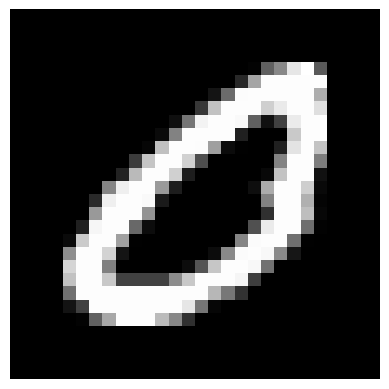

In [3]:
# Wählen einer beliebigen Instance aus den Trainingsdaten
random_instance = X_train[0]

# Reshape der Instance zu einer 28x28 Matrix
image = random_instance.reshape(28, 28)

# Anzeigen des Bildes mit matplotlib's imshow
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### 1. Trainieren von Binary Classifiers

Wir trainieren auf MNIST zunächst einen binären Classifier. Machen Sie aus den alten Labels 0,1,2, ..., 9 neue Labels y_train_4 bzw. y_test_4, welche den Wert 1 haben für y=4 und 0 sonst.

In [4]:
y_train_4 = (y_train == 4).astype(int)
y_test_4 = (y_test == 4).astype(int)

Trainieren Sie auf MNIST mit den neuen Labels ein Logistic Regression Modell log_reg, das bestimmt, ob eine handgeschriebene Zahl eine vier ist. Falls die Optimierung nicht konvergiert, drehen Sie an einer der Hyperparameter für die Optimierung (max_iter oder solver) - lesen Sie dazu auch gerne die Scikit-Learn Dokumentation.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train_4)


LogisticRegression(max_iter=1000, solver='liblinear')

Als nächstes testieren wir für den obigen ML Task eine Support Vector Machine. Das training der SVM mit allen Daten würde allerdings länger dauern als die obigen Modelle. Dies liegt daran, dass die Dauer zum trainieren von SVMs auch linear von der Anzahl von Instances abhängt!

Scikit Learn's LinearSVC (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) ist schneller als SVC mit der Option kernel = 'linear' (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Allerdings kann man damit keine soft classification durchführen. (Normalerweise liefert der normale SVM Algorithmus auch harte Labels und keine Wahrscheinlichkeiten. Nur durch Platt Scaling kann man sie nachträglich in Wahrscheinlichkeitsvektoren umwandeln).

Wir brauchen hier jedoch für spätere Auswertungen Wahrscheinlichkeiten, daher verwenden Sie SVC mit kernel = 'linear'.

Daher trainieren wir hier nur auf den ersten 10.000 trainings-Daten. Legen Sie einen auf die ersten 10.000 instances reduzierten Datensatz X_train_small an und die entsprechenden Labels y_train_4_small.

Trainieren Sie nun auf diesen Daten für den obigen ML Task eine Linear Support Vector Machine svm_clf mit C =0.5. Verwenden Sie die Option probability=True, um Platt Scaling und den Output von Wahrscheinlichkeiten zu ermöglichen. 

In [ ]:
'''
from sklearn.svm import SVC
import joblib

X_train_small = X_train[:10000]
y_train_4_small = y_train_4[:10000]

svm_clf = SVC(C=0.5, probability=True, kernel='linear')
svm_clf.fit(X_train_small, y_train_4_small)

joblib.dump(svm_clf, f'{MNIST_PATH}/SVM_Classifier_MNIST.sav')
'''

['datasets/MNIST/SVM_Classifier_MNIST.sav']

Speichern Sie den SVM Classifier mit joblib.dump() unter dem Pfad MNIST_PATH  als 'SVM_Classifier_MNIST.sav'. (https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html). Wenn Sie das Praktikum später nochmal durchmachen, sparen Sie sich so das erneute trainieren. 
In der Praxis würden Sie jedes trainierte Modell nach dem Training abspeichern, und den Code zum Trainieren des Modells auskommentieren, damit Sie die Rechenleistung/-zeit nur ein einziges Mal aufbringen müssen. Zum Verwenden des Modells können Sie das Modell später einfach mit svm_clf = joblib.load(Pfad-des-Modells) wieder laden. (https://joblib.readthedocs.io/en/latest/generated/joblib.load.html#joblib.load)

In [14]:
import joblib

svm_clf = joblib.load(f'{MNIST_PATH}/SVM_Classifier_MNIST.sav')

Was würde bei SVM für den Fall C=float("inf") passieren? Es gäbe keinen Toleranzraum mehr, die Margin würde ignoriert werden. Bei großen Daten würde man sehr stark overfitten, da es dort oft Rauschen, Überlappungen und Ausreißer gibt. Außerdem aäre das Modell schlecht Generalisiert.

#TODO: hard SVM classification

Nun wollen wir mit etlichen statistischen Methoden die zwei angelegten Modelle log_reg, svm_clf miteinander vergleichen: 
- Schauen Sie sich die Confusion Matrix für beide Modelle an mit confusion_matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) die Confustion Matrix ausgeben. 
- Berechnen Sie Accuracy, Precision, Recall and F1-Score der Modelle mit `precision_score, recall_score, f1_score` aus `sklearn.metrics`. Was bedeuten Precision, Recall und F1-Score? 
  #TODO: Precision = True Positives/(True Positives + False Positives)
i.e. if the model gives a positive prediction (i.e. h(x)=1), how likely is the prediction correct?

Recall = True Positives/(True Positives + False Positives)

i.e. if you have a positive instance, how likely will the model get it right, i.e. predict it to be positive?

Recall nennt man auch Sensitivity. 
  


In [16]:
# Confusion Matrix

from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve)


y_pred_svm = svm_clf.predict(X_test)
y_pred_lg = log_reg.predict(X_test)


cm_SVM = confusion_matrix(y_test, y_pred_svm)
cm_lg = confusion_matrix(y_test, y_pred_lg)

print("Konfusionsmatrix-SVM:")
print(cm_SVM)
print()
print("Konfusionsmatrix-LG")
print(cm_lg)

Konfusionsmatrix-SVM:
[[1375    6    0    0    0    0    0    0    0    0]
 [1567    8    0    0    0    0    0    0    0    0]
 [1361   37    0    0    0    0    0    0    0    0]
 [1416   12    0    0    0    0    0    0    0    0]
 [ 216 1149    0    0    0    0    0    0    0    0]
 [1225   38    0    0    0    0    0    0    0    0]
 [1319   56    0    0    0    0    0    0    0    0]
 [1438   21    0    0    0    0    0    0    0    0]
 [1351   14    0    0    0    0    0    0    0    0]
 [1288  103    0    0    0    0    0    0    0    0]]

Konfusionsmatrix-LG
[[1379    2    0    0    0    0    0    0    0    0]
 [1575    0    0    0    0    0    0    0    0    0]
 [1382   16    0    0    0    0    0    0    0    0]
 [1426    2    0    0    0    0    0    0    0    0]
 [ 148 1217    0    0    0    0    0    0    0    0]
 [1255    8    0    0    0    0    0    0    0    0]
 [1358   17    0    0    0    0    0    0    0    0]
 [1446   13    0    0    0    0    0    0    0    0]
 [

In [17]:
# Accuracy, Precision, Recall, F1-Score
print('Report Logistic Regression:')
print(classification_report(y_test_4, y_pred_lg))
print('Report SVM:')
print(classification_report(y_test_4, y_pred_svm))
        

Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12635
           1       0.92      0.89      0.91      1365

    accuracy                           0.98     14000
   macro avg       0.96      0.94      0.95     14000
weighted avg       0.98      0.98      0.98     14000

Report SVM:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12635
           1       0.80      0.84      0.82      1365

    accuracy                           0.96     14000
   macro avg       0.89      0.91      0.90     14000
weighted avg       0.96      0.96      0.96     14000



Warum nimmt man beim F1-Score den harmonic mean und nicht einfach den Mittelwert von Precision und Recall? Was ist der Vorteil?

#TODO: Siehe Vorlesung; F1-Score bestraft Fälle stärker, in denen entweder Recall oder Precision sehr klein sind.

**Der harmonische Mittelwert liegt näher am kleineren Wert von Precision oder Recall. Wenn einer der Werte sehr klein ist, zieht er den F1-Score deutlich nach unten. Dies ist gewollt, da eine hohe Precision allein (oder ein hoher Recall allein) nicht ausreicht, um eine gute Performance zu garantieren.**

##### Precision-Recall-Curve

Wir wollen nun die Precision_Recall-Curve für die Testdaten zeichnen. 

Erinnerung: Für ein Modell (mit fixem Threshold für die Wahrscheinlichkeit, zum Beispiel 50%, ab dem man eine Instance als positiv klassifiziert), gibt es einen Wert für Precision, und einen Wert für Recall. 

Lässt man allerdings den Threshold variieren (zum Beispiel weil man lieber auf Nummer sicher gehen will bei einer positiven Klassifizierung und erst ab 80% Wahrscheinlichkeit etwas als positiv klassifizieren lässt), so ändern sich entsprechend Recall und Precision Werte. Nun kann man den Threshold kontinuierlich von 0 bis 100% variieren - das ändert nicht die Wahrscheinlichkeitsvektoren, die das Modell prognostiziert, aber die Klassen, die auf Basis dieses Wahrscheinlichkeitsvektors für jede Instance festgelegt werden. 

Plottet man nun Recall und Precision für unterschiedliche Thresholds zwischen 0 und 100%, erhält man die Precision-Recall-Curve. 

Daher braucht precision_recall_curve als Input die vorhergesagten Wahrscheinlichkeiten des positiven Labels, nicht die vorhergesagten Klassen (die ändern sich ja, wenn man den Threshold variiert)! Also legen wir uns in der nächsten Zelle zunächst ein Dictionary dict_test_predictions_proba an, das für jedes Modell die vorhergesagten Wahrscheinlichkeitsvektoren (mit .predict_proba()) für das Test Set abspeichert.


In [18]:
#Berechnen der (2-dimensionalen) Wahrscheinlichkeitsvektoren (für negative und positive Klasse)
dict_test_predictions_proba = {}

test_predictions_proba = svm_clf.predict_proba(X_test)

# Speichern der Wahrscheinlichkeitsvektoren im Dictionary
dict_test_predictions_proba['svm_clf'] = test_predictions_proba

# Ausgabe zur Überprüfung
print(dict_test_predictions_proba['svm_clf'])


[[9.99999814e-01 1.86154292e-07]
 [9.99985778e-01 1.42219158e-05]
 [9.99995306e-01 4.69378311e-06]
 ...
 [7.89305843e-01 2.10694157e-01]
 [9.99999876e-01 1.24358220e-07]
 [9.99998852e-01 1.14755515e-06]]


Nun berechnen Sie für jedes Modell aus den oben ausgerechneten Wahrscheinlichkeiten die Precision-Recall-Curve, indem Sie y_test_4 vergleichen mit den Wahrscheinlichkeiten der positiven Klasse, die Sie oben berechnet haben (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). Hinweis: die Wahrscheinlichkeit der positiven Klasse (1) ist der zweite Eintrag in den Wahrscheinlichkeitsvektoren (der erste ist die Wahrscheinlichkeit der negativen Klasse 0). 

Erinnerung: precision_recall_curve gibt ein Tupel zurück, das aus einer Liste der precision-Werte, einer Liste der recall-Werte, und einer LIste der zugehörigen threshold-werte ausgibt. Mit diesen Werten kann man plotten.

Legen Sie sich zum Speichern der zu plottenden Daten für die vier Modelle ein Dictionary namens dict_precisions_recalls an, in dem Sie für jedes Modell precision, recall und threshold in einer Liste abspeichern. 

In [11]:
#Berechnen der precision_recall_curve


In [12]:
#Zeichnen der Precision-Recall Curve mit plt



Welches der Modelle denken Sie ist hier das Bessere?

#TODO: Logistic Regression; SVM wurde nicht auf allen Daten trainiert. 